In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pandas import read_csv
from pandas import datetime

# load dataset
data0 = pd.read_csv('datasets/training_data/training_data_attacks.csv')
data = pd.read_csv('datasets/challenging_data/challenging_no2.csv')

In [2]:
data0 = data0.drop(['Unnamed: 0'], axis=1)
data0.isnull().values.any()

False

In [3]:
print(data.columns)
np.where(data0.columns == 'e212_imsi')

Index(['e212_imsi', '0', '10', '11', '12', '13', '14', '2', '23', '3', '4',
       '45', '54', '56', '57', '59', '60', '7', '70', '8', 'label'],
      dtype='object')


(array([18]),)

In [42]:
list(dd.columns)

['e212_imsi',
 'frame_time_epoch',
 'tcap_localValue',
 'tcap_result',
 'tcap_returnResultLast_element',
 'tcap_invokeID',
 'gsm_old_localValue',
 'sccp_called_digits',
 'e164_country_code',
 'sccp_calling_digits',
 'sccp_calling_ssn',
 'e164_country_code_3',
 'gsm_map_ms_imsi',
 'gsm_map_ms_vlr_Number',
 'gsm_map_ms_supportedCamelPhases',
 'tcap_invokeID_2',
 'gsm_old_localValue_2',
 'tcap_tid',
 'gsm_map_ss_forwardedToNumber',
 'tcap_dtid',
 'label']

In [4]:
good_features = list(data.columns)
good_features[0] = '18'
good_features.pop()

'label'

In [5]:
good_features = [int(a) for a in good_features]

In [6]:
good_features

[18, 0, 10, 11, 12, 13, 14, 2, 23, 3, 4, 45, 54, 56, 57, 59, 60, 7, 70, 8]

In [7]:
data0['label'].reset_index()

,index,label
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


In [8]:
dd = data0.iloc[:, good_features]
dd = pd.concat([dd, data0['label']], axis=1)

In [9]:
dd.head()

,e212_imsi,frame_time_epoch,tcap_localValue,tcap_result,tcap_returnResultLast_element,tcap_invokeID,gsm_old_localValue,sccp_called_digits,e164_country_code,sccp_calling_digits,...,e164_country_code_3,gsm_map_ms_imsi,gsm_map_ms_vlr_Number,gsm_map_ms_supportedCamelPhases,tcap_invokeID_2,gsm_old_localValue_2,tcap_tid,gsm_map_ss_forwardedToNumber,tcap_dtid,label
0,0.000000e+00,1.518010e+09,13.0,0.0,1.0,0.0,13.0,4.910192e+11,0.0,4.910190e+11,...,0.0,0.0,0.0,0.0,0.0,0.0,1.112611e+10,0.0,1.112611e+10,0.0
1,2.621731e+14,1.518010e+09,22.0,0.0,0.0,0.0,22.0,4.910192e+11,49.0,4.910190e+11,...,0.0,0.0,0.0,0.0,0.0,0.0,5.110001e+09,0.0,7.077430e+07,0.0
2,0.000000e+00,1.518010e+09,22.0,0.0,1.0,0.0,22.0,4.910192e+11,49.0,4.910190e+11,...,0.0,0.0,0.0,0.0,0.0,0.0,7.077430e+07,0.0,7.077430e+07,0.0
3,0.000000e+00,1.518010e+09,0.0,0.0,0.0,0.0,0.0,4.910192e+11,0.0,4.910190e+11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0
4,0.000000e+00,1.518010e+09,0.0,0.0,0.0,0.0,0.0,4.910192e+11,0.0,4.910190e+11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0


In [10]:
data0.head()

,frame_time_epoch,frame_len,sccp_called_digits,sccp_calling_digits,sccp_calling_ssn,sccp_called_ssn,sccp_message_type,tcap_tid,tcap_dtid,tcap_application_context_name,...,gsm_map_ms_allGPRSData_element,gsm_map_ss_SS_Code_4,gsm_map_ss_SS_Code_more,gsm_map_ms_apn_Subscribed,gsm_map_ms_apn_InUse,gsm_map_ss_basicService_more,gsm_map_ss_forwardedToNumber_more,gsm_map_ms_msisdn_2,gsm_map_ms_msisdn_3,label
0,1.518010e+09,212.0,4.910192e+11,4.910190e+11,6.0,7.0,17.0,1.112611e+10,1.112611e+10,40010182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.518010e+09,288.0,4.910192e+11,4.910190e+11,6.0,8.0,17.0,5.110001e+09,7.077430e+07,4001053.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.518010e+09,252.0,4.910192e+11,4.910190e+11,6.0,8.0,17.0,7.077430e+07,7.077430e+07,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.518010e+09,352.0,4.910192e+11,4.910190e+11,6.0,7.0,17.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.518010e+09,352.0,4.910192e+11,4.910190e+11,6.0,7.0,17.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
len(data)
data.head()

,e212_imsi,0,10,11,12,13,14,2,23,3,...,45,54,56,57,59,60,7,70,8,label
0,1949101901111,0.0,0.0,0.0,0.0,0.0,0.0,222.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,262171000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,262171000000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,262171000000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,262171000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [12]:
# balance the labels
# make 
# strategy to do something with the inf data
# randomize the input
# too slow, need multicore running, and feature selection, any other trick?

In [13]:
# data = data.astype('float32') # TODO: make sure it doesn't hurt!
# data = data.drop(['Unnamed: 0'], axis=1)
# data.reset_index(inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.head()

,e212_imsi,0,10,11,12,13,14,2,23,3,...,45,54,56,57,59,60,7,70,8,label
0,1949101901111,0.0,0.0,0.0,0.0,0.0,0.0,222.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,262171000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,262171000000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,262171000000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,262171000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [14]:
data.isnull().values.any()

False

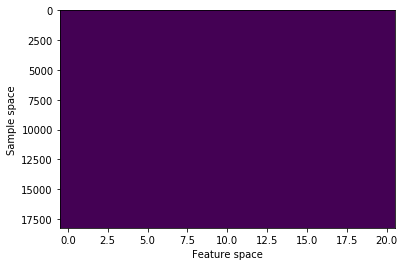

total number of null cells:  0


e212_imsi    0
0            0
10           0
11           0
12           0
13           0
14           0
2            0
23           0
3            0
4            0
45           0
54           0
56           0
57           0
59           0
60           0
7            0
70           0
8            0
label        0
dtype: int64

In [15]:
# Check Nan values
plt.imshow(data.isnull(), aspect='auto')
plt.xlabel('Feature space')
plt.ylabel('Sample space')
plt.show()

print("total number of null cells: ", np.sum(np.sum(data.isnull())))
np.sum(data.isnull())

In [16]:
# https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
data._get_numeric_data().columns.values in data.columns.values # all numerical no categorical data to worry about!

True

In [17]:
len(dd)

377709

In [23]:
from sklearn.metrics import f1_score

In [36]:
from sklearn import *
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split

def RMSE(y, yhat):
    return metrics.mean_squared_error(y, yhat)**0.5

# hold-out 
valid_size = int(len(data) * 30 /100)
# split
# X_train = dd[:-valid_size]
# X_valid = dd[-valid_size:]

col = [c for c in dd if c not in ['label']]
X_train, X_valid, y_train, y_valid = train_test_split(dd[col], dd['label'], 
                                                    test_size=valid_size, 
                                                    random_state=0)

print("validation size: ", valid_size)
print("train size: ", X_train.shape)
print("test size: ", X_valid.shape)

# model1 = ensemble.GradientBoostingClassifier(learning_rate=0.2, random_state=3, n_estimators=100, subsample=0.8, 
#                       max_depth =10)
# model2 = neighbors.KNeighborsClassifier()#n_jobs=-1, n_neighbors=5)
# model3 = XGBClassifier(learning_rate=0.1, random_state=3, n_estimators=200, subsample=0.7, 
#                       colsample_bytree=0.8, max_depth =12)
model4 = ensemble.RandomForestClassifier(random_state=3, max_depth=3, verbose=True)
model5 = ensemble.AdaBoostClassifier(random_state=3, n_estimators=10, learning_rate=0.1) # loss='square'?
# model6 = ensemble.ExtraTreesClassifier(random_state=3, max_depth=10)
# model7 = ensemble.BaggingClassifier(random_state=3)

# model1.fit(X_train[col], X_train['label'].values)
# model2.fit(X_train[col], X_train['label'].values)
# model3.fit(X_train[col], X_train['label'].values)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
# model6.fit(X_train[col], X_train['label'].values)
# model7.fit(X_train[col], X_train['label'].values)

validation size:  5474
train size:  (372235, 20)
test size:  (5474, 20)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=10, random_state=3)

### Train Prediction

In [37]:
# preds1 = model1.predict(X_train[col])
# preds2 = model2.predict(X_train[col])
# preds3 = model3.predict(X_train[col])
preds4 = model4.predict(X_train)
preds5 = model5.predict(X_train)
# preds6 = model6.predict(X_train[col])
# preds7 = model7.predict(X_train[col])

# rmse1 = RMSE(X_train['amount_daily'].values, preds1)
# rmse2 = RMSE(X_train['label'].values, preds2)
# rmse3 = RMSE(X_train['amount_daily'].values, preds3)
rmse4 = f1_score(y_train, preds4, average='micro')
rmse5 = f1_score(y_train, preds5, average='micro')
# rmse6 = RMSE(X_train['amount_daily'].values, preds6)
# rmse7 = RMSE(X_train['amount_daily'].values, preds7)

# print("## Train set loss: ")
# print('RMSE GradientBoostingRegressor: ', rmse1)
# print('RMSE KNeighborsRegressor: ', rmse2)
# print('RMSE XGBRegressor: ', rmse3)
print('RMSE RandomForestRegressor: ', rmse4)
print('RMSE AdaBoostRegressor: ', rmse5)
# print('RMSE ExtraTreesRegressor: ', rmse6)
# print('RMSE BaggingRegressor: ', rmse7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


RMSE RandomForestRegressor:  0.9992128628420218
RMSE AdaBoostRegressor:  0.9992128628420218


### Valid Prediction

In [39]:
# preds1 = model1.predict(X_valid[col])
# preds2 = model2.predict(X_valid[col])
# preds3 = model3.predict(X_valid[col])
preds4 = model4.predict(X_valid)
preds5 = model5.predict(X_valid)
# preds6 = model6.predict(X_valid[col])
# preds7 = model7.predict(X_valid[col])
# print("-"*10)


# rmse1 = RMSE(X_valid['amount_daily'].values, preds1)
# rmse2 = RMSE(X_valid['label'].values, preds2)
# rmse3 = RMSE(X_valid['amount_daily'].values, preds3)
rmse4 = f1_score(y_valid, preds4, average='micro')
rmse5 = f1_score(y_valid, preds5, average='micro')
# rmse6 = RMSE(X_valid['amount_daily'].values, preds6)
# rmse7 = RMSE(X_valid['amount_daily'].values, preds7)


# print("## Valid set loss: ")
# print('RMSE GradientBoostingRegressor: ', rmse1)
# print('RMSE KNeighborsRegressor: ', rmse2)
# print('RMSE XGBRegressor: ', rmse3)
print('RMSE RandomForestRegressor: ', rmse4)
print('RMSE AdaBoostRegressor: ', rmse5)
# print('RMSE ExtraTreesRegressor: ', rmse6)
# print('RMSE BaggingRegressor: ', rmse7)

RMSE RandomForestRegressor:  0.999269272926562
RMSE AdaBoostRegressor:  0.999269272926562


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
